In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pwlf

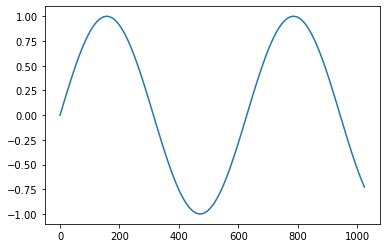

In [2]:
x = np.linspace(0, 1024, 100)
y = np.sin(.01*x)
plt.figure()
plt.plot(x, y)

In [3]:
from GPyOpt.methods import BayesianOptimization

In [4]:
my_pwlf = pwlf.PiecewiseLinFit(x, y, degree=2)
number_of_line_segments = 4
my_pwlf.use_custom_opt(number_of_line_segments)

In [5]:
# define domain for possible breakpoints
bounds = [{'name': 'break_1', 'type': 'discrete',
           'domain': np.arange(1, 1023)},
          {'name': 'break_2', 'type': 'discrete',
           'domain': np.arange(1, 1023)},
          {'name': 'break_3', 'type': 'discrete',
           'domain': np.arange(1, 1023)}]
max_iter = 120

In [6]:
def my_obj(x):
    f = np.zeros(x.shape[0])
    for i, j in enumerate(x):
        f[i] = my_pwlf.fit_with_breaks_opt(j)
    return f

In [7]:
myBopt = BayesianOptimization(my_obj,
                              domain=bounds, model_type='GP',
                              initial_design_numdata=20,
                              initial_design_type='latin',
                              exact_feval=True, verbosity=True,
                              verbosity_model=False)

In [8]:
myBopt.run_optimization(max_iter=max_iter, verbosity=True)

num acquisition: 1, time elapsed: 0.20s
num acquisition: 2, time elapsed: 0.40s
num acquisition: 3, time elapsed: 0.60s
num acquisition: 4, time elapsed: 0.79s
num acquisition: 5, time elapsed: 0.97s
num acquisition: 6, time elapsed: 1.15s
num acquisition: 7, time elapsed: 1.35s
num acquisition: 8, time elapsed: 1.53s
num acquisition: 9, time elapsed: 1.73s
num acquisition: 10, time elapsed: 1.93s
num acquisition: 11, time elapsed: 2.11s
num acquisition: 12, time elapsed: 2.30s
num acquisition: 13, time elapsed: 2.49s
num acquisition: 14, time elapsed: 2.76s
num acquisition: 15, time elapsed: 3.01s
num acquisition: 16, time elapsed: 3.28s
num acquisition: 17, time elapsed: 3.51s
num acquisition: 18, time elapsed: 3.79s
num acquisition: 19, time elapsed: 4.08s
num acquisition: 20, time elapsed: 4.32s
num acquisition: 21, time elapsed: 4.57s
num acquisition: 22, time elapsed: 4.83s
num acquisition: 23, time elapsed: 5.08s
num acquisition: 24, time elapsed: 5.34s
num acquisition: 25, time

In [9]:
print('\n \n Opt found \n')
print('Optimum number of line segments:', myBopt.x_opt)
print('Function value:', myBopt.fx_opt)


 
 Opt found 

Optimum number of line segments: [612. 310. 842.]
Function value: 0.058342840166060575


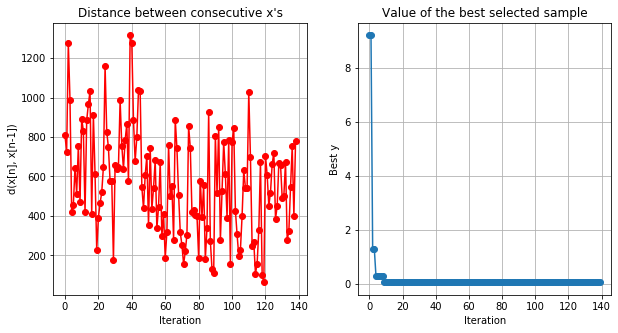

In [10]:
myBopt.plot_convergence()

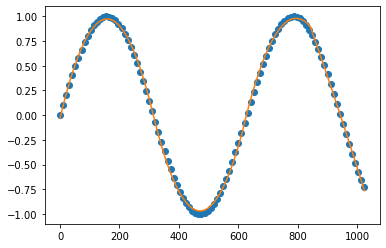

In [11]:
# perform the fit for the optimum
x_opt = list(myBopt.x_opt)
x_opt.append(x.min())
x_opt.append(x.max())
ssr = my_pwlf.fit_with_breaks(x_opt)
# predict for the determined points
xHat = np.linspace(min(x), max(x), num=10000)
yHat = my_pwlf.predict(xHat)

# plot the results
plt.figure()
plt.plot(x, y, 'o')
plt.plot(xHat, yHat, '-')
plt.show()

In [12]:
ssr

0.058342840166060575